In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [3]:
diamonds = sns.load_dataset('diamonds')

In [4]:
diamonds.head(3)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31


In [65]:
diamonds.loc[diamonds['price']==max(diamonds['price'])]

,carat,cut,color,clarity,depth,table,price,x,y,z
27749,2.29,Premium,I,VS2,60.8,60.0,18823,8.5,8.47,5.16


In [5]:
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB


In [6]:
diamonds.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [7]:
diamonds.shape

(53940, 10)

In [8]:
diamonds['cut'].value_counts()

cut
Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: count, dtype: int64

In [9]:
diamonds.corr(numeric_only=True)

,carat,depth,table,price,x,y,z
carat,1.000000,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387
depth,0.028224,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924
table,0.181618,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929
price,0.921591,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249
x,0.975094,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772
y,0.951722,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006
z,0.953387,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000


In [13]:
diamonds.groupby('cut')['price'].max().to_frame()

C:\Users\רותם\AppData\Local\Temp\ipykernel_1100\2081054267.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  diamonds.groupby('cut')['price'].max().to_frame()


,price
cut,
Ideal,18806
Premium,18823
Very Good,18818
Good,18788
Fair,18574


In [14]:
diamonds.groupby('cut')['price'].min().to_frame()

C:\Users\רותם\AppData\Local\Temp\ipykernel_1100\1700286045.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  diamonds.groupby('cut')['price'].min().to_frame()


,price
cut,
Ideal,326
Premium,326
Very Good,336
Good,327
Fair,337


In [7]:
diamonds.sort_values('price',ascending=False).head(10)

,carat,cut,color,clarity,depth,table,price,x,y,z
27749,2.29,Premium,I,VS2,60.8,60.0,18823,8.50,8.47,5.16
27748,2.00,Very Good,G,SI1,63.5,56.0,18818,7.90,7.97,5.04
27747,1.51,Ideal,G,IF,61.7,55.0,18806,7.37,7.41,4.56
27746,2.07,Ideal,G,SI2,62.5,55.0,18804,8.20,8.13,5.11
27745,2.00,Very Good,H,SI1,62.8,57.0,18803,7.95,8.00,5.01
27744,2.29,Premium,I,SI1,61.8,59.0,18797,8.52,8.45,5.24
27742,2.04,Premium,H,SI1,58.1,60.0,18795,8.37,8.28,4.84
27743,2.00,Premium,I,VS1,60.8,59.0,18795,8.13,8.02,4.91
27740,1.71,Premium,F,VS2,62.3,59.0,18791,7.57,7.53,4.70
27741,2.15,Ideal,G,SI2,62.6,54.0,18791,8.29,8.35,5.21


In [10]:
diamonds[['price','carat','cut']].sort_values('price',ascending=False).head(10)

,price,carat,cut
27749,18823,2.29,Premium
27748,18818,2.00,Very Good
27747,18806,1.51,Ideal
27746,18804,2.07,Ideal
27745,18803,2.00,Very Good
27744,18797,2.29,Premium
27742,18795,2.04,Premium
27743,18795,2.00,Premium
27740,18791,1.71,Premium
27741,18791,2.15,Ideal


In [12]:
diamonds.sort_values('price',ascending=False)

,carat,cut,color,clarity,depth,table,price,x,y,z
27749,2.29,Premium,I,VS2,60.8,60.0,18823,8.50,8.47,5.16
27748,2.00,Very Good,G,SI1,63.5,56.0,18818,7.90,7.97,5.04
27747,1.51,Ideal,G,IF,61.7,55.0,18806,7.37,7.41,4.56
27746,2.07,Ideal,G,SI2,62.5,55.0,18804,8.20,8.13,5.11
27745,2.00,Very Good,H,SI1,62.8,57.0,18803,7.95,8.00,5.01
...,...,...,...,...,...,...,...,...,...,...
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31


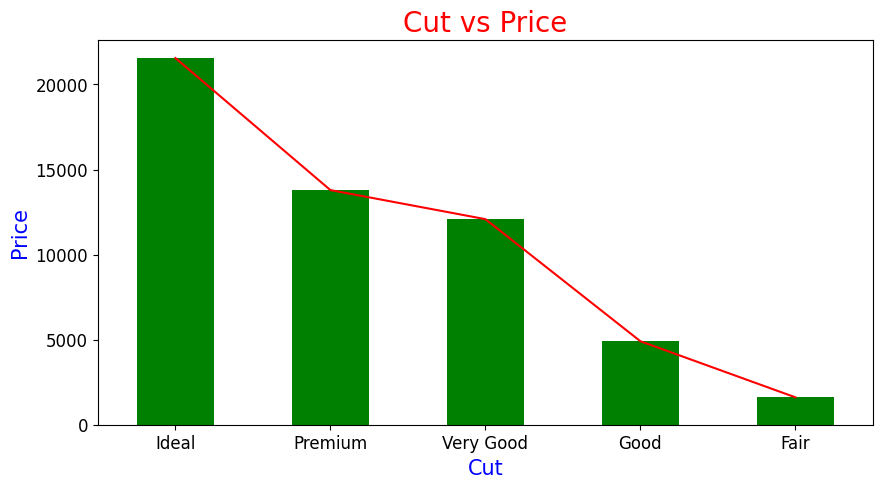

In [40]:
diamonds['cut'].value_counts().plot(kind='bar', x='cut', y='price', color='green', figsize=(10,5),  fontsize=12)
diamonds['cut'].value_counts().plot(kind='line', x='cut', y='price', color='red', figsize=(10,5),  fontsize=12)
plt.title('Cut vs Price', fontsize=20, color='red')
plt.xlabel('Cut', fontsize=15, color='blue')
plt.ylabel('Price', fontsize=15, color='blue')
plt.show()

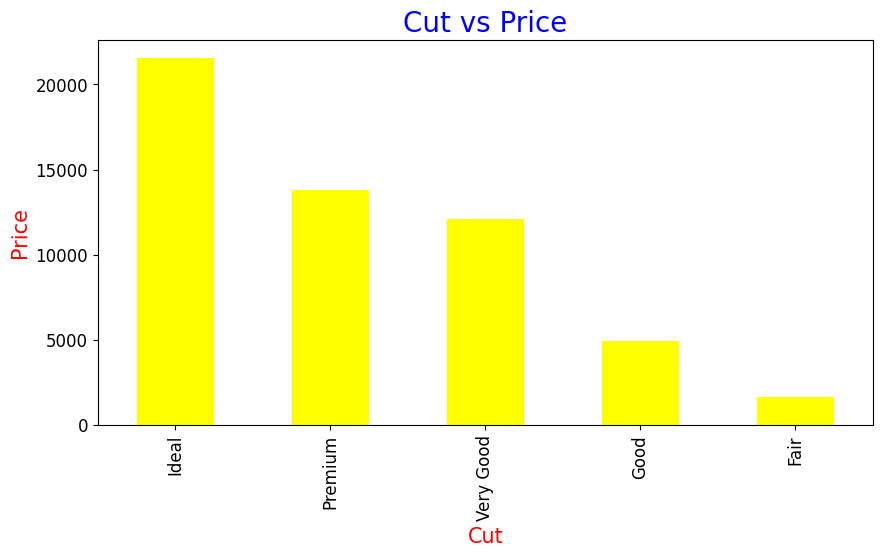

In [46]:
diamonds['cut'].value_counts().plot(kind='bar', x='cut', y='price', color='yellow', figsize=(10,5),  fontsize=12)
plt.title('Cut vs Price', fontsize=20, color='blue')
plt.xlabel('Cut', fontsize=15, color='red')
plt.ylabel('Price', fontsize=15, color='red')
plt.show()

Text(0.5, 1.0, 'Cut vs Price')

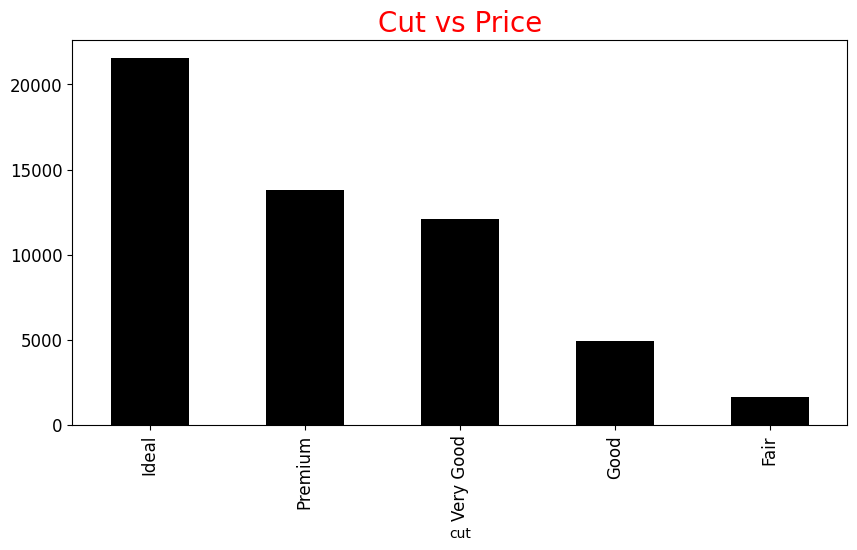

In [58]:
diamonds['cut'].value_counts().plot(kind='bar',x='cut', y='price', color='black', figsize=(10,5),  fontsize=12)
diamonds['cut'].value_counts().plot(kind='bar',x='cut', y='price', color='black', figsize=(10,5),  fontsize=12)
plt.title('Cut vs Price', fontsize=20, color='red')



Text(0, 0.5, 'Price')

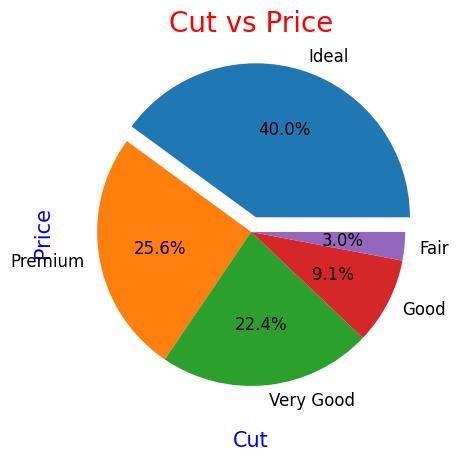

In [63]:
diamonds['cut'].value_counts().plot(kind='pie', x='cut', y='price', figsize=(10,5),  fontsize=12, autopct='%1.1f%%', explode=(0.1, 0, 0, 0, 0))
plt.title('Cut vs Price', fontsize=20, color='red')
plt.xlabel('Cut', fontsize=15, color='blue')
plt.ylabel('Price', fontsize=15, color='blue')


In [72]:
# פרטי היהלום הכי יקר ומחירו
diamonds[diamonds.price==max(diamonds.price)]

,carat,cut,color,clarity,depth,table,price,x,y,z
27749,2.29,Premium,I,VS2,60.8,60.0,18823,8.5,8.47,5.16


In [82]:
# מחיר ממוצע של יהלום
diamonds.price.mean()

3932.799721913237

In [99]:
# כמה יהולומים מסוג Ideal קיימים
diamonds['cut'].value_counts()['Ideal']

21551

In [100]:
diamonds.color.value_counts()

color
G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: count, dtype: int64

In [104]:
diamonds'cut'=='Premium']

KeyError: False